# 🧾 Metadata

**1.Descripción de los datos.**

Este dataset contiene información sobre los solicitantes de préstamos y sus correspondientes decisiones de aprobación

Las características de este dataset son las siguientes:
Volumen estimado: 9000
Fuente: https://www.kaggle.com/datasets/sahilislam007/loan-factors-prediction-dataset

**2.- Diccionario de datos**

Name: Nombre del cliente.

Age: Edad del solicitante (en años).

Gender: Genero del solicitante (Male/Female).

MaritalStatus: Estado civil del solicitante (Single/Married/Widowed/Divorced).

EducationLevel: Nivel más alto de educación alcanzado (High School/Bachelor/Master/PhD/Other).

EmploymentStatus: Situación laboral del solicitante (Employed/Self-employed/Unemployed).

AnnualIncome: Ingresos anuales del solicitante (en USD).

LoanAmountRequested: Monto del préstamo solicitado (en USD).

PurposeOfLoan: El propósito del préstamo (e.g., Personal, Home, Car, Education).

CreditScore: Puntaje de crédito de la solicitante (Puntuación numérica que va de 300 a 850).

ExistingLoansCount: Número de préstamos que el solicitante tiene actualmente.

LatePaymentsLastYear: Número de pagos atrasados realizados en el último año.

LoanApproved: Estado de aprobación del préstamo (Yes/No).


# 🎯  Objetivo Analitico

**1- Objetivo Analitico**

Entrenar un modelo que sea capaz de otorgar un prestamo de forma automatica.


**2- Contexto Comercial**

La empresa de prestamos nos pidio crear un modelo de machine learning que sea capaz de otorgar prestamos de forma automatica segun los factores del solicitante


**3- Problema Comercial**

La tarea de otorgar un prestamo es manual y tediosa y se quiere automatizar.

# 🔍 EDA - Análisis Exploratorio de Datos

In [3]:
import pandas as pd 
import numpy as np

In [4]:
loan_data = pd.read_csv('synthetic_loan_data.csv')
loan_data.shape

(9000, 14)

In [5]:
loan_data.head()

,CustomerID,Name,Age,Gender,MaritalStatus,EducationLevel,EmploymentStatus,AnnualIncome,LoanAmountRequested,PurposeOfLoan,CreditScore,ExistingLoansCount,LatePaymentsLastYear,LoanApproved
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Michelle Prince,56,Male,Divorced,Other,Employed,97622,46413,Personal,500,2,4,Yes
1,23b8c1e9-3924-46de-beb1-3b9046685257,Diana Mullins,69,Male,Married,Bachelor,Employed,96925,24065,Home,532,2,0,Yes
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Brittany Ballard,46,Female,Single,High School,Self-employed,167927,46676,Personal,795,2,6,Yes
3,972a8469-1641-4f82-8b9d-2434e465e150,Matthew Freeman,32,Female,Widowed,PhD,Unemployed,112920,27406,Education,376,2,9,No
4,17fc695a-07a0-4a6e-8822-e8f36c031199,Amy Baker,60,Female,Widowed,Master,Unemployed,152183,49337,Car,517,3,7,No


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            9000 non-null   object
 1   Name                  9000 non-null   object
 2   Age                   9000 non-null   int64 
 3   Gender                9000 non-null   object
 4   MaritalStatus         9000 non-null   object
 5   EducationLevel        9000 non-null   object
 6   EmploymentStatus      9000 non-null   object
 7   AnnualIncome          9000 non-null   int64 
 8   LoanAmountRequested   9000 non-null   int64 
 9   PurposeOfLoan         9000 non-null   object
 10  CreditScore           9000 non-null   int64 
 11  ExistingLoansCount    9000 non-null   int64 
 12  LatePaymentsLastYear  9000 non-null   int64 
 13  LoanApproved          9000 non-null   object
dtypes: int64(6), object(8)
memory usage: 984.5+ KB


In [7]:
loan_data.describe()

,Age,AnnualIncome,LoanAmountRequested,CreditScore,ExistingLoansCount,LatePaymentsLastYear
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,43.550444,110279.808556,25680.583333,573.193333,2.008444,4.475444
std,14.909264,52147.330689,14116.494549,158.013843,1.414110,2.878403
min,18.000000,20009.000000,1000.000000,300.000000,0.000000,0.000000
25%,31.000000,65443.250000,13564.750000,437.000000,1.000000,2.000000
50%,43.000000,110331.000000,25814.000000,574.000000,2.000000,4.000000
75%,56.000000,155539.250000,37941.500000,708.000000,3.000000,7.000000
max,69.000000,199988.000000,49989.000000,849.000000,4.000000,9.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

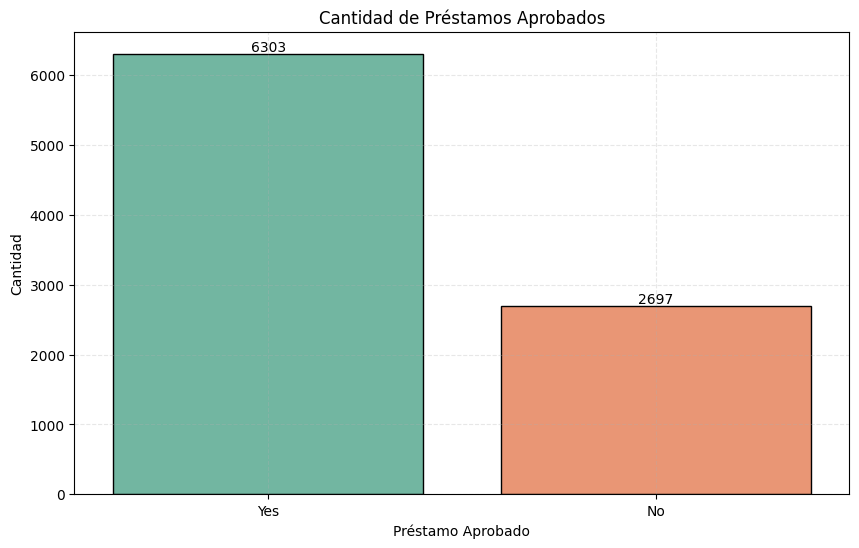

In [9]:
# Grafico de barra que muestra la cantidad de préstamos aprobados
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_data, x="LoanApproved", hue="LoanApproved",legend=False, palette="Set2", edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()), xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), ha="center", va="bottom", fontsize=10, color="black")
plt.title('Cantidad de Préstamos Aprobados')
plt.xlabel('Préstamo Aprobado')
plt.ylabel('Cantidad')
plt.grid(linestyle="--", alpha=0.30)
plt.show()

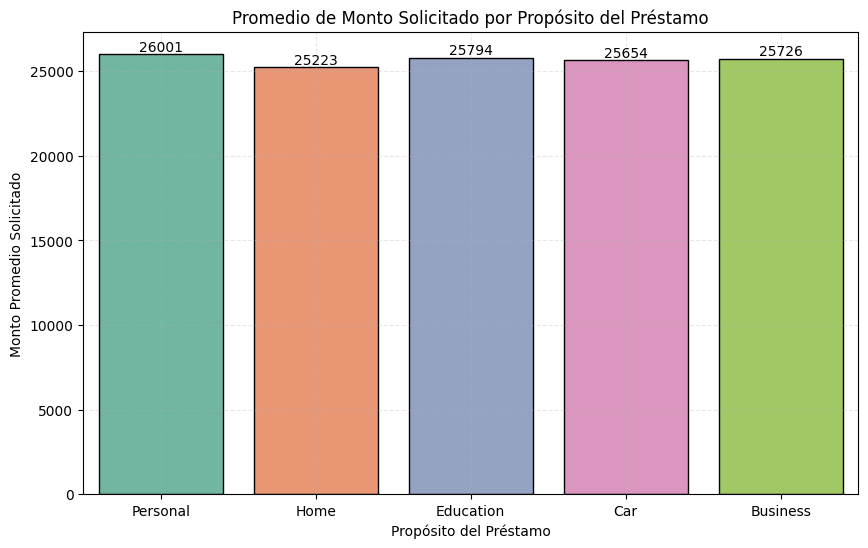

In [10]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=loan_data, x="PurposeOfLoan", y="LoanAmountRequested", hue="PurposeOfLoan",legend=False,  estimator="mean", errorbar=None, palette="Set2", edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()), xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), ha="center", va="bottom", fontsize=10, color="black")
plt.title("Promedio de Monto Solicitado por Propósito del Préstamo")
plt.ylabel("Monto Promedio Solicitado")
plt.xlabel("Propósito del Préstamo")
plt.grid(linestyle="--", alpha=0.30)
plt.show()

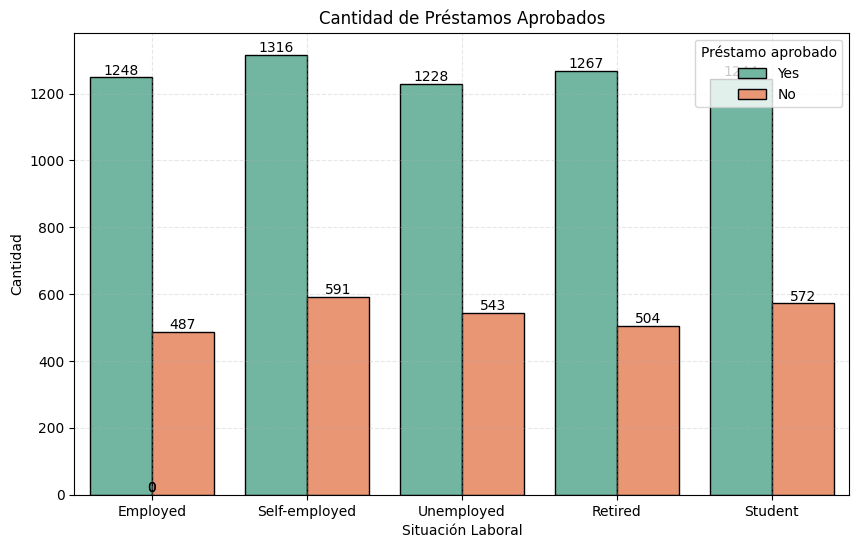

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_data, x="EmploymentStatus",hue="LoanApproved",palette="Set2", edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()), xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), ha="center", va="bottom", fontsize=10, color="black")
plt.title('Cantidad de Préstamos Aprobados')
plt.xlabel('Situación Laboral')
plt.ylabel('Cantidad')
plt.legend(title='Préstamo aprobado', loc='upper right')
plt.grid(linestyle="--", alpha=0.30)
plt.show()

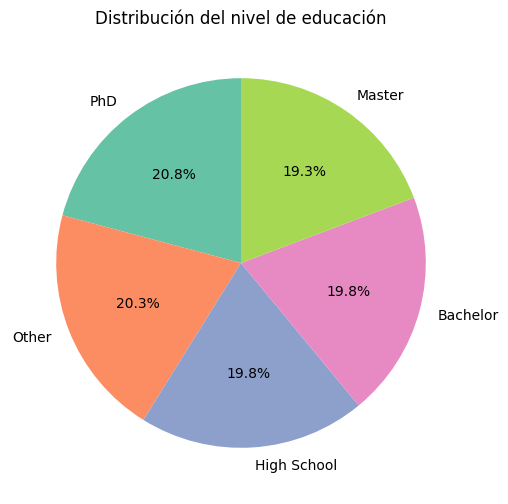

In [12]:
plt.figure(figsize=(10, 6))
lvleducacion_counts = loan_data['EducationLevel'].value_counts()
plt.pie(lvleducacion_counts, labels=lvleducacion_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribución del nivel de educación')
plt.show()


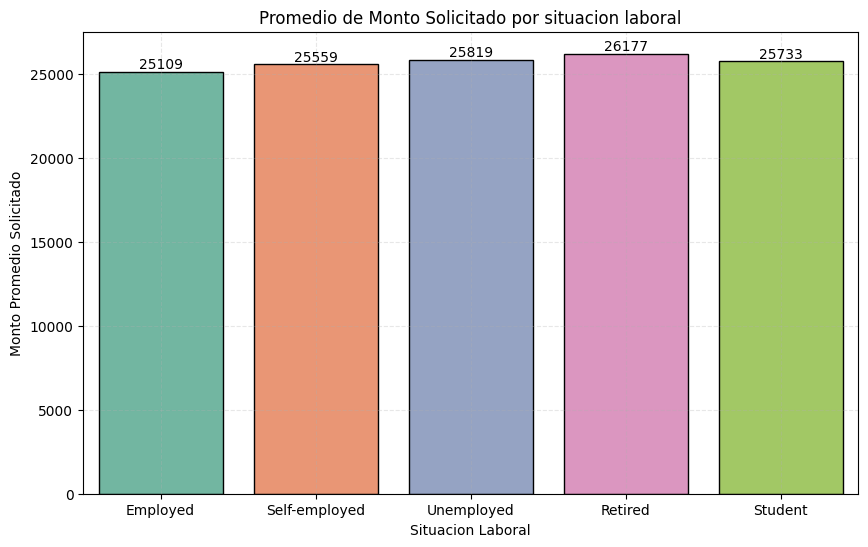

In [13]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=loan_data, x="EmploymentStatus", y="LoanAmountRequested", hue="EmploymentStatus",legend=False,  estimator="mean", errorbar=None, palette="Set2", edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()), xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), ha="center", va="bottom", fontsize=10, color="black")
plt.title("Promedio de Monto Solicitado por situacion laboral")
plt.ylabel("Monto Promedio Solicitado")
plt.xlabel("Situacion Laboral")
plt.grid(linestyle="--", alpha=0.30)
plt.show()

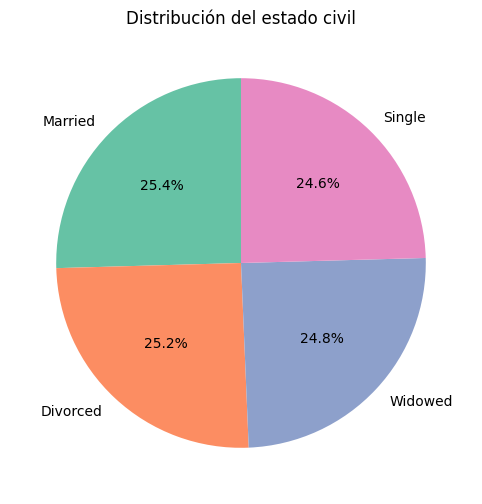

In [14]:
plt.figure(figsize=(10, 6))
estadocivil_counts = loan_data['MaritalStatus'].value_counts()
plt.pie(estadocivil_counts, labels=estadocivil_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribución del estado civil')
plt.show()

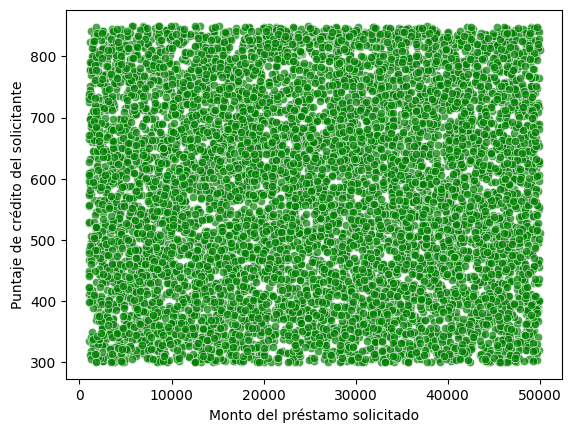

In [18]:
sns.scatterplot(data=loan_data,x="LoanAmountRequested",y="CreditScore",alpha=0.7, color="green")
plt.xlabel("Monto del préstamo solicitado")
plt.ylabel("Puntaje de crédito del solicitante")
plt.show() 

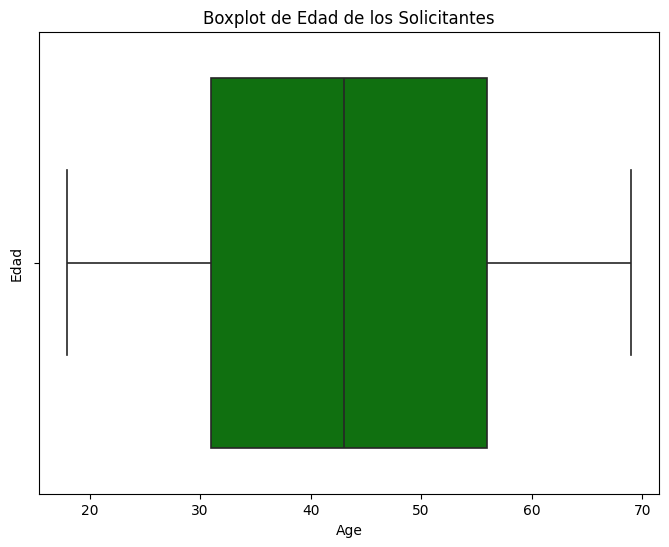

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=loan_data, x="Age", color="green", linewidth=1.2)
plt.ylabel("Edad")
plt.title("Boxplot de Edad de los Solicitantes")
plt.show()

## Conclusion parcial - Analisis explotarotio

1- Hay una mayor cantidad de prestamos otorgados.

2- El estado civil y el nivel de educacion estan balanceados.

3- No hay correlacion entre el puntaje del solicitande y el monto del prestamo solicitado.

4- No hay outliers en la columna edad.
